# Finding Replacement Player for Cristiano Ronaldo in Manchester United

## Import The Libraries

In [434]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.neighbors import NearestNeighbors

## Reading The Data 

### DataFrame #1

In [435]:
fifa = pd.read_csv('Fifa 23 Players Data.csv')#loading the dataset using read.csv()

In [436]:
fifa.head(10) #show the first 10 rows of the dataframe

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21
5,M. Salah,Mohamed Salah,90,90,115500000,RW,RW,Egypt,https://cdn.sofifa.net/players/209/331/23_60.png,30,...,90,85,90,74,71,74,70,61,70,25
6,T. Courtois,Thibaut Courtois,90,91,90000000,GK,GK,Belgium,https://cdn.sofifa.net/players/192/119/23_60.png,30,...,34,35,34,32,34,32,32,32,32,90
7,M. Neuer,Manuel Neuer,90,90,13500000,GK,GK,Germany,https://cdn.sofifa.net/players/167/495/23_60.png,36,...,47,53,47,39,46,39,38,37,38,90
8,Cristiano Ronaldo,C. Ronaldo dos Santos Aveiro,90,90,41000000,ST,ST,Portugal,https://cdn.sofifa.net/players/020/801/23_60.png,37,...,87,81,87,65,62,65,61,56,61,23
9,V. van Dijk,Virgil van Dijk,90,90,98000000,CB,CB,Netherlands,https://cdn.sofifa.net/players/203/376/23_60.png,30,...,73,79,73,83,88,83,85,90,85,23


In [437]:
#get the current shape of the dataframe
fifa.shape

(18539, 89)

In [438]:
#Checking the columns for na values
for column in fifa.columns:
    print(column)
    print(pd.isna(fifa[column]).sum())

Known As
0
Full Name
0
Overall
0
Potential
0
Value(in Euro)
0
Positions Played
0
Best Position
0
Nationality
0
Image Link
0
Age
0
Height(in cm)
0
Weight(in kg)
0
TotalStats
0
BaseStats
0
Club Name
0
Wage(in Euro)
0
Release Clause
0
Club Position
0
Contract Until
0
Club Jersey Number
0
Joined On
0
On Loan
0
Preferred Foot
0
Weak Foot Rating
0
Skill Moves
0
International Reputation
0
National Team Name
0
National Team Image Link
0
National Team Position
0
National Team Jersey Number
0
Attacking Work Rate
0
Defensive Work Rate
0
Pace Total
0
Shooting Total
0
Passing Total
0
Dribbling Total
0
Defending Total
0
Physicality Total
0
Crossing
0
Finishing
0
Heading Accuracy
0
Short Passing
0
Volleys
0
Dribbling
0
Curve
0
Freekick Accuracy
0
LongPassing
0
BallControl
0
Acceleration
0
Sprint Speed
0
Agility
0
Reactions
0
Balance
0
Shot Power
0
Jumping
0
Stamina
0
Strength
0
Long Shots
0
Aggression
0
Interceptions
0
Positioning
0
Vision
0
Penalties
0
Composure
0
Marking
0
Standing Tackle
0
Sliding

In [439]:
#description of the data
fifa.describe()

,Overall,Potential,Value(in Euro),Age,Height(in cm),Weight(in kg),TotalStats,BaseStats,Wage(in Euro),Release Clause,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
count,18539.000000,18539.000000,1.853900e+04,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,1.853900e+04,...,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000,18539.000000
mean,65.852042,71.016668,2.875461e+06,25.240412,181.550839,75.173904,1602.114569,357.946221,8824.537462,5.081688e+06,...,58.451319,57.374076,58.451319,56.281569,55.928583,56.281569,55.650251,54.528184,55.650251,23.257134
std,6.788353,6.192866,7.635129e+06,4.718163,6.858097,7.013593,273.160237,39.628259,19460.531154,1.467203e+07,...,13.987122,13.171194,13.987122,13.903836,13.872190,13.903836,14.159466,14.743929,14.159466,15.108925
min,47.000000,48.000000,0.000000e+00,16.000000,155.000000,49.000000,759.000000,224.000000,0.000000,0.000000e+00,...,18.000000,18.000000,18.000000,17.000000,19.000000,17.000000,17.000000,18.000000,17.000000,10.000000
25%,62.000000,67.000000,4.750000e+05,21.000000,177.000000,70.000000,1470.000000,331.000000,1000.000000,6.650000e+05,...,54.000000,53.000000,54.000000,51.000000,48.000000,51.000000,49.000000,45.000000,49.000000,17.000000
50%,66.000000,71.000000,1.000000e+06,25.000000,182.000000,75.000000,1640.000000,358.000000,3000.000000,1.500000e+06,...,62.000000,60.000000,62.000000,59.000000,59.000000,59.000000,59.000000,58.000000,59.000000,18.000000
75%,70.000000,75.000000,2.000000e+06,29.000000,186.000000,80.000000,1786.000000,385.000000,8000.000000,3.400000e+06,...,67.000000,66.000000,67.000000,66.000000,66.000000,66.000000,65.000000,66.000000,65.000000,20.000000
max,91.000000,95.000000,1.905000e+08,44.000000,206.000000,105.000000,2312.000000,502.000000,450000.000000,3.667000e+08,...,92.000000,91.000000,92.000000,88.000000,89.000000,88.000000,87.000000,90.000000,87.000000,90.000000


In [440]:
#print information about the data frame
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18539 entries, 0 to 18538
Data columns (total 89 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Known As                     18539 non-null  object
 1   Full Name                    18539 non-null  object
 2   Overall                      18539 non-null  int64 
 3   Potential                    18539 non-null  int64 
 4   Value(in Euro)               18539 non-null  int64 
 5   Positions Played             18539 non-null  object
 6   Best Position                18539 non-null  object
 7   Nationality                  18539 non-null  object
 8   Image Link                   18539 non-null  object
 9   Age                          18539 non-null  int64 
 10  Height(in cm)                18539 non-null  int64 
 11  Weight(in kg)                18539 non-null  int64 
 12  TotalStats                   18539 non-null  int64 
 13  BaseStats                    18

In [441]:
fifa['Contract Until'] = np.where(fifa['Contract Until'] =='-', '0', fifa['Contract Until'])
fifa['Contract Until'] = fifa['Contract Until'].astype(str)# convert data type of the 'contract until' column to string

In [442]:
#check for duplicate rows
fifa.duplicated().sum()

119

In [443]:
#return the number of unique values in each column
fifa.nunique()

Known As          17530
Full Name         18337
Overall              45
Potential            48
Value(in Euro)      257
                  ...  
RWB Rating           72
LB Rating            71
CB Rating            73
RB Rating            71
GK Rating            64
Length: 89, dtype: int64

## Cleaning The Data

In [444]:
#1 - Remove irrelevant data
#2 - Remove duplicate data
#3 - fix structural errors (not found within this database)
#4 - deal with missing data (not applicable on this dataset as this dataset doesn't have missing data)
#5 - filter out data outliers
#6 - Validate data

In [445]:
#removing irrelevant data
fifa.drop(['Full Name', 'Image Link' , 'Club Position' , 'Club Jersey Number', 'International Reputation', 'National Team Name', 'National Team Image Link', 'National Team Position', 'National Team Jersey Number' , 'Attacking Work Rate' , 'Defensive Work Rate' , 'Goalkeeper Diving' , 'Goalkeeper Handling', ' GoalkeeperKicking' ,'Goalkeeper Positioning', 'Goalkeeper Reflexes', 'ST Rating', 'CF Rating', 'RW Rating', 'LW Rating', 'LF Rating', 'RF Rating', 'CAM Rating', 'LM Rating', 'CM Rating', 'RM Rating', 'LWB Rating', 'RWB Rating', 'CDM Rating', 'LB Rating', 'RB Rating', 'CB Rating', 'GK Rating' ],axis=1,inplace=True)

In [446]:
fifa.shape

(18539, 56)

In [447]:
fifa.head(10)

,Known As,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,...,91,44,40,93,94,75,96,20,35,24
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,...,80,63,39,92,89,84,90,43,24,18
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,...,84,81,49,94,81,90,88,35,42,19
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,...,91,75,66,88,94,83,89,68,65,53
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,...,82,64,38,92,83,80,88,26,34,32
5,M. Salah,90,90,115500000,RW,RW,Egypt,30,175,71,...,85,63,55,92,85,86,92,38,43,41
6,T. Courtois,90,91,90000000,GK,GK,Belgium,30,199,96,...,17,23,15,13,44,27,66,20,18,16
7,M. Neuer,90,90,13500000,GK,GK,Germany,36,193,93,...,16,29,30,12,70,47,70,17,10,11
8,Cristiano Ronaldo,90,90,41000000,ST,ST,Portugal,37,187,83,...,90,63,29,95,76,90,95,24,32,24
9,V. van Dijk,90,90,98000000,CB,CB,Netherlands,30,193,92,...,64,85,90,47,65,62,90,92,92,86


In [448]:
fifa.columns

Index(['Known As', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Contract Until',
       'Joined On', 'On Loan', 'Preferred Foot', 'Weak Foot Rating',
       'Skill Moves', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Power', 'Jumping', 'Stamina', 'Strength', 'Long Shots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'Standing Tackle', 'Sliding Tackle'],
      dtype='object')

In [449]:
#removing all 119 duplicates from the dataset
fifa.drop_duplicates()

,Known As,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),Weight(in kg),...,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
0,L. Messi,91,91,54000000,RW,CAM,Argentina,35,169,67,...,91,44,40,93,94,75,96,20,35,24
1,K. Benzema,91,91,64000000,"CF,ST",CF,France,34,185,81,...,80,63,39,92,89,84,90,43,24,18
2,R. Lewandowski,91,91,84000000,ST,ST,Poland,33,185,81,...,84,81,49,94,81,90,88,35,42,19
3,K. De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,31,181,70,...,91,75,66,88,94,83,89,68,65,53
4,K. Mbappé,91,95,190500000,"ST,LW",ST,France,23,182,73,...,82,64,38,92,83,80,88,26,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18534,D. Collins,47,56,110000,"ST,RM",CAM,Republic of Ireland,21,174,68,...,46,37,22,50,52,40,47,39,29,27
18535,Yang Dejiang,47,57,90000,CDM,CDM,China PR,17,175,60,...,35,52,46,35,40,33,45,46,50,52
18536,L. Mullan,47,67,130000,CM,RM,Northern Ireland,18,170,65,...,36,39,24,42,50,43,59,39,37,48
18537,D. McCallion,47,61,100000,CB,CB,Republic of Ireland,17,178,65,...,18,42,54,23,32,37,41,50,54,54


In [450]:
#drop the Goalkeeper positions because they're irrelevent to this analysis
fifa= fifa[fifa['Best Position'] != 'GK']

In [451]:
fifa.drop(['Positions Played' ],axis=1,inplace=True)

In [452]:
fifa.shape

(16478, 55)

## Exploratory Data Analysis

<AxesSubplot:xlabel='Overall', ylabel='Count'>

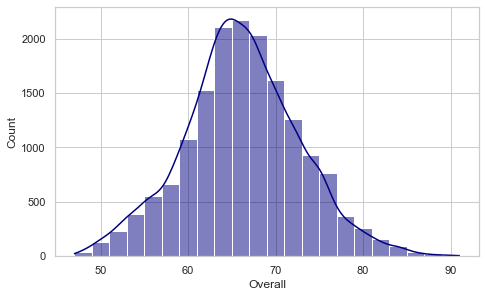

In [453]:
#create a histogram to explore the general overall of all the players where most of the players lay on the spectrum
sns.histplot(data = fifa['Overall'] , color = 'navy',binwidth = 2  , kde = True)

The histogram shows that players that are 75 overall or over are a very small number of all the players, which would narrow up the candidates that can replace ronaldo a bit

<AxesSubplot:xlabel='Age', ylabel='Count'>

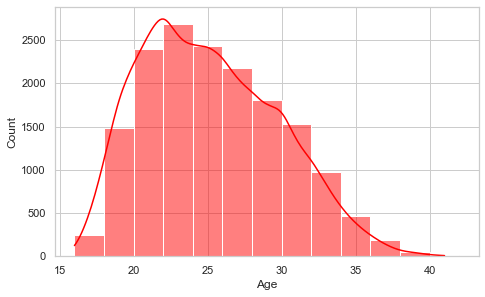

In [454]:
sns.histplot(data = fifa['Age'] , color = 'red' ,binwidth = 2 , kde = True)

This histogram shows that most players average in the mid-20's range which means they would have alot of potential to grow and alot of time to get better.

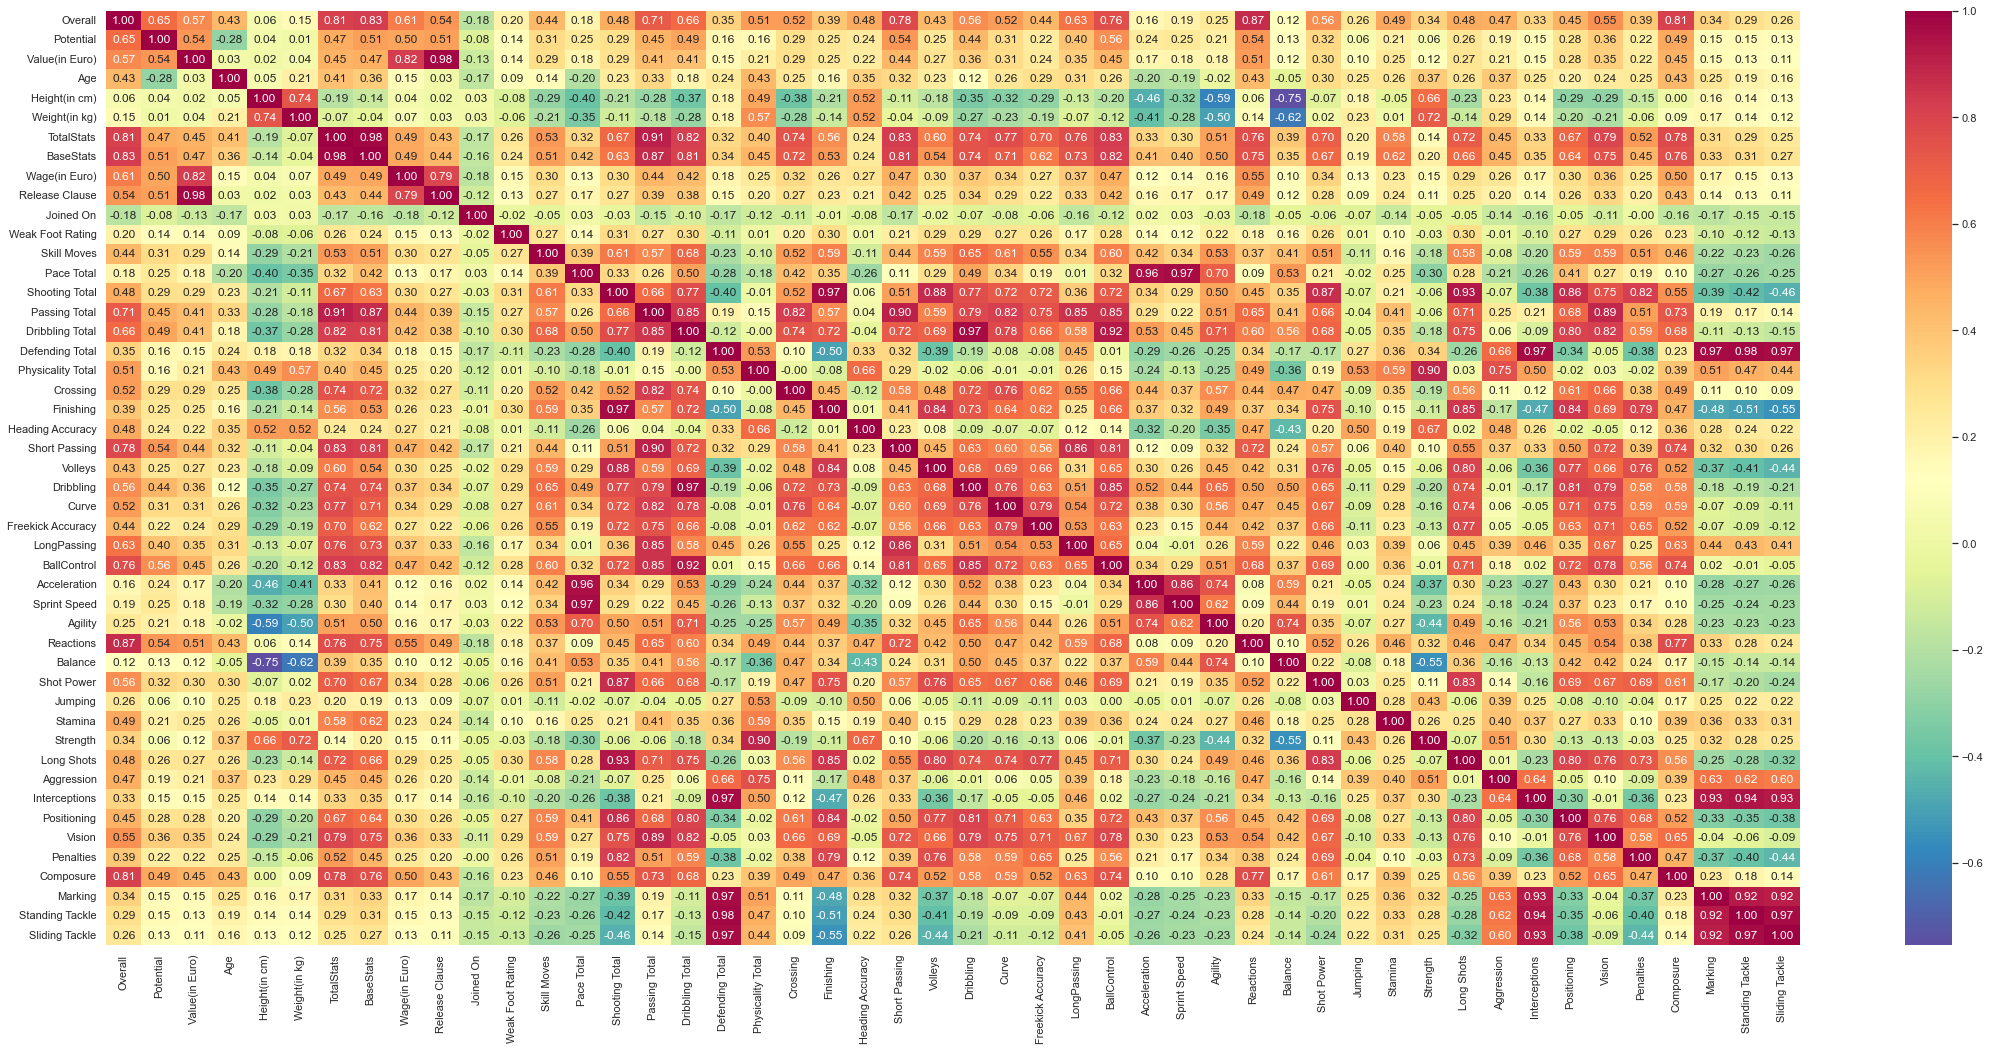

In [455]:
plt.figure(figsize = (30,15))
fig = sns.heatmap(fifa.corr(), 
                 cbar=True, 
                 annot=True,  
                 fmt='.2f', 
                 cmap="Spectral_r"
                 )
plt.show()

this heatmap shows third interesting observation which are that there is a high correlation(0.84) between overall and Base stats which makes sense because when a player has high base stats he should have a high overall, the second observation is that there is a high correlation (0.87) between overall and reactions which means that usually players with high overalls have good reactions and know how to read other players which will help when looking for replacements for ronaldo which has 94 reactions. The final observation is that there is high correlation of 0.70 between composure and overall, which shows that good quality players know how to stay composed through out the 90 minutes of play time and not get affected by other factors.
These observations will be kept in mind while looking for the player we are searching for.

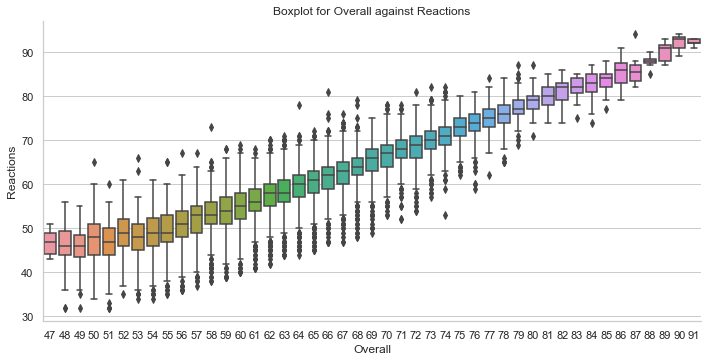

In [456]:
sns.catplot(x='Overall', y='Reactions', data = fifa , kind = 'box' , aspect = 2)
plt.title('Boxplot for Overall against Reactions')
plt.show()

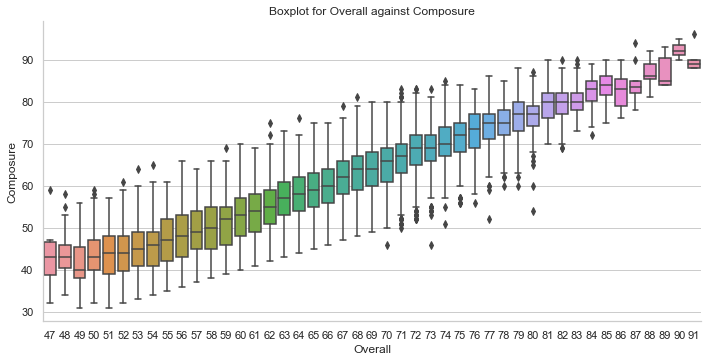

In [457]:
sns.catplot(x='Overall', y='Composure', data = fifa , kind = 'box' , aspect = 2)
plt.title('Boxplot for Overall against Composure')
plt.show()

## Classifying positions into 3 different categories

This step is crucial to avoid confusion and will help simplify the analysis where positions are classified to forward, midfielder, or defender instead of the multiple positions that are in the table Right now

In [458]:
fifa.replace(['ST','RW','LW','CF','RM','LM'], 3,inplace= True) # Forward positions will be known as 3 in the dataset to make things easier for analysis
fifa.replace(['CM','CDM','CAM'], 2, inplace = True) # Midfielder positions will be known as 2 in the dataset 
fifa.replace (['CB','RB','LB','RWB','LWB'], 1, inplace = True)# Defender positions will be known as 1 in the dataset to make things easier 

In [459]:
fifa.head(7)

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
0,L. Messi,91,91,54000000,2,Argentina,35,169,67,2190,...,91,44,40,93,94,75,96,20,35,24
1,K. Benzema,91,91,64000000,3,France,34,185,81,2147,...,80,63,39,92,89,84,90,43,24,18
2,R. Lewandowski,91,91,84000000,3,Poland,33,185,81,2205,...,84,81,49,94,81,90,88,35,42,19
3,K. De Bruyne,91,91,107500000,2,Belgium,31,181,70,2303,...,91,75,66,88,94,83,89,68,65,53
4,K. Mbappé,91,95,190500000,3,France,23,182,73,2177,...,82,64,38,92,83,80,88,26,34,32
5,M. Salah,90,90,115500000,3,Egypt,30,175,71,2226,...,85,63,55,92,85,86,92,38,43,41
8,Cristiano Ronaldo,90,90,41000000,3,Portugal,37,187,83,2159,...,90,63,29,95,76,90,95,24,32,24


In [460]:
Cristiano = fifa.loc[(fifa['Known As']== 'Cristiano Ronaldo')] #saving ronaldo's row incase I lose him while further cleaning.

## Exploring Cristiano's best attributes

In [461]:
print(fifa.iloc[6])

Known As             Cristiano Ronaldo
Overall                             90
Potential                           90
Value(in Euro)                41000000
Best Position                        3
Nationality                   Portugal
Age                                 37
Height(in cm)                      187
Weight(in kg)                       83
TotalStats                        2159
BaseStats                          445
Club Name            Manchester United
Wage(in Euro)                   220000
Release Clause                77900000
Contract Until                    2023
Joined On                         2021
On Loan                              -
Preferred Foot                   Right
Weak Foot Rating                     4
Skill Moves                          5
Pace Total                          81
Shooting Total                      92
Passing Total                       78
Dribbling Total                     85
Defending Total                     34
Physicality Total        

This shows that the highest attributes (more than or equal 85) for Cristiano are : 
Finishing / Heading Accuracy / Volleys / Dribbling / Ball Control / Reactions / Shot Power / Jumping / Long Shots / Positioning / Penalties / Composure

In [462]:
import plotly.express as px
df = fifa[fifa["Known As"] == "Cristiano Ronaldo"]
fig = px.line_polar(df, r=[df['Finishing'].values[0],df['Heading Accuracy'].values[0],
                           df['Volleys'].values[0],df['Dribbling'].values[0],df['BallControl'].values[0],
                           df['Reactions'].values[0],
                          df['Shot Power'].values[0],df['Jumping'].values[0],df['Long Shots'].values[0],df['Positioning'].values[0],df['Penalties'].values[0],df['Composure'].values[0]],
                    theta=['Finishing','Heading','Volleys','Dribbling','Ball Control','Reactions','Shot Power',
                                              'Jumping','Long Shots','Positioning','Penalties','Composure'], line_close=True,
                    color_discrete_sequence=px.colors.sequential.Plasma_r,
                    template="plotly_dark",)
fig.show()

/Users/youssefayman/opt/anaconda3/lib/python3.9/site-packages/plotly/express/_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [463]:
def stats(name):
    return fifa[fifa['Known As'] == name ][['Known As', 'Overall', 'Potential','Best Position','Age', 'Finishing','Heading Accuracy','Volleys','Dribbling','BallControl','Reactions','Shot Power',
                                              'Jumping','Long Shots','Positioning','Penalties','Composure']]
stats('Cristiano Ronaldo')

,Known As,Overall,Potential,Best Position,Age,Finishing,Heading Accuracy,Volleys,Dribbling,BallControl,Reactions,Shot Power,Jumping,Long Shots,Positioning,Penalties,Composure
8,Cristiano Ronaldo,90,90,3,37,93,90,86,85,88,94,93,95,90,95,90,95


## Forwards in Manchester United

Before looking in the whole world, I must look first in the club to see if the option is already inside the club. Furthermore, I'm going to take a look at all the forwards available in Manchester United and compare them to Ronaldo.

In [464]:
manutdrep = fifa.loc[(fifa['Club Name']== 'Manchester United') & (fifa['Best Position'] == 3)]
manutdrep

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
8,Cristiano Ronaldo,90,90,41000000,3,Portugal,37,187,83,2159,...,90,63,29,95,76,90,95,24,32,24
226,Antony,82,88,49000000,3,Brazil,22,174,63,2010,...,76,76,39,76,79,66,80,46,37,21
323,M. Rashford,81,85,37000000,3,England,24,186,70,2072,...,78,69,39,78,76,85,75,40,38,33
501,A. Martial,80,83,28000000,3,France,26,184,76,1973,...,74,54,34,78,75,80,78,26,33,31
2042,A. Elanga,74,85,9500000,3,Sweden,20,178,75,1829,...,63,42,31,73,65,56,69,35,38,33
4790,F. Pellistri,70,82,3800000,3,Uruguay,20,175,65,1754,...,61,42,31,65,63,66,65,35,27,24
10793,Alejandro Garnacho,64,85,1900000,3,Argentina,18,180,70,1586,...,56,46,25,60,56,56,62,18,23,20


The table above shows that there are only 6 other forwards other than Cristiano. He plays alongside 2 of them which are usually Antony and Rashford. Pellistri, Garnacho and Elanga are still  young to take on a huge role like this, of ourse they all have a high potential but they will not affect the team immediately, so this leaves us with Martial.

In [465]:
#the dataset wrote sancho as a midfielder but he plays for United as a forward
manutdrep2 = fifa.loc[(fifa['Known As']== 'J. Sancho')]
manutdrep2

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
144,J. Sancho,84,88,61500000,2,England,22,180,76,1977,...,65,44,39,81,85,74,85,32,39,32


Now we have two players that could potentially take ronaldo's place but lets compare ronaldo's best attributes to theirs.

In [466]:
manutd = [manutdrep, manutdrep2]

In [467]:
replacements = pd.concat(manutd)

In [468]:
replacements

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
8,Cristiano Ronaldo,90,90,41000000,3,Portugal,37,187,83,2159,...,90,63,29,95,76,90,95,24,32,24
226,Antony,82,88,49000000,3,Brazil,22,174,63,2010,...,76,76,39,76,79,66,80,46,37,21
323,M. Rashford,81,85,37000000,3,England,24,186,70,2072,...,78,69,39,78,76,85,75,40,38,33
501,A. Martial,80,83,28000000,3,France,26,184,76,1973,...,74,54,34,78,75,80,78,26,33,31
2042,A. Elanga,74,85,9500000,3,Sweden,20,178,75,1829,...,63,42,31,73,65,56,69,35,38,33
4790,F. Pellistri,70,82,3800000,3,Uruguay,20,175,65,1754,...,61,42,31,65,63,66,65,35,27,24
10793,Alejandro Garnacho,64,85,1900000,3,Argentina,18,180,70,1586,...,56,46,25,60,56,56,62,18,23,20
144,J. Sancho,84,88,61500000,2,England,22,180,76,1977,...,65,44,39,81,85,74,85,32,39,32


In [469]:
replacements = replacements[['Known As', 'Overall', 'Potential','Best Position','Age', 'Finishing','Heading Accuracy','Volleys','Dribbling','BallControl','Reactions','Shot Power',
                                              'Jumping','Long Shots','Positioning','Penalties','Composure']]

In [470]:
replacements.drop([2042,4790,10793,323,226],axis=0,inplace=True)

/var/folders/_5/fk2q70ks6cv1r4lh88zxfj480000gn/T/ipykernel_1815/2888388914.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [471]:
#create a replacements table for manchester united replacements
replacements

,Known As,Overall,Potential,Best Position,Age,Finishing,Heading Accuracy,Volleys,Dribbling,BallControl,Reactions,Shot Power,Jumping,Long Shots,Positioning,Penalties,Composure
8,Cristiano Ronaldo,90,90,3,37,93,90,86,85,88,94,93,95,90,95,90,95
501,A. Martial,80,83,3,26,79,70,76,87,84,78,83,72,74,78,80,78
144,J. Sancho,84,88,2,22,77,38,83,91,88,81,71,51,65,81,74,85


now that all the potential manchester united replacements are in one table, I'll display some data visualization to see if they really are competent enough to take his place


In [472]:
import plotly.graph_objects as go
fig = go.Figure()
df= fifa[fifa["Known As"] == "Cristiano Ronaldo"]
fig.add_trace(go.Scatterpolar(
        r = [df['Finishing'].values[0],df['Heading Accuracy'].values[0],
        df['Volleys'].values[0],df['Dribbling'].values[0],df['BallControl'].values[0], df['Reactions'].values[0],
        df['Shot Power'].values[0],df['Jumping'].values[0],df['Long Shots'].values[0],
        df['Positioning'].values[0],df['Penalties'].values[0],df['Composure'].values[0]],        
        theta = ['Finishing','Heading','Volleys','Dribbling','Ball Control','Reactions','Shot Power',
                                              'Jumping','Long Shots','Positioning','Penalties','Composure'],
        mode = 'lines',
        name = 'Cristiano Ronaldo',
        fill='toself',
        line_color = 'lightcoral'
    ))

s=fifa[fifa["Known As"] == "J. Sancho"]
fig.add_trace(go.Scatterpolar(
        r = [s['Finishing'].values[0],s['Heading Accuracy'].values[0],
        s['Volleys'].values[0],s['Dribbling'].values[0],s['BallControl'].values[0], s['Reactions'].values[0],
        s['Shot Power'].values[0],s['Jumping'].values[0],s['Long Shots'].values[0],
        s['Positioning'].values[0],s['Penalties'].values[0],s['Composure'].values[0]],        
        theta = ['Finishing','Heading','Volleys','Dribbling','Ball Control','Reactions','Shot Power',
                                              'Jumping','Long Shots','Positioning','Penalties','Composure'],
        mode = 'lines',
        name = 'Jadon Sancho',
        fill='toself',
        line_color = 'darkred'))
    
m =fifa[fifa["Known As"] == "A. Martial"]
fig.add_trace(go.Scatterpolar(
        r = [m['Finishing'].values[0],m['Heading Accuracy'].values[0],
        m['Volleys'].values[0],m['Dribbling'].values[0],m['BallControl'].values[0], m['Reactions'].values[0],
        m['Shot Power'].values[0],m['Jumping'].values[0],m['Long Shots'].values[0],
        m['Positioning'].values[0],m['Penalties'].values[0],m['Composure'].values[0]],        
        theta = ['Finishing','Heading','Volleys','Dribbling','Ball Control','Reactions','Shot Power',
                                              'Jumping','Long Shots','Positioning','Penalties','Composure'],
        mode = 'lines',
        name = 'Anthony Martial',
        fill='toself',
        line_color = 'red'
    ))

   The graph above shows that those two players do not come close to where Cristiano's attributes are, sancho does exceed him in dribbling, but in other aspects of the game he is far off. On the other hand, Martial also exceeds cristiano in dribbling but is more of a complete forward than Sancho. He's an all around better striker, maybe not the best but he's not missing an attribute like sancho is.
    All in all, this graph show that they are not competent enough to take cristiano's place so now we will have to start our analysis on the rest of the players

## Removing irrelevent attributes and players (Data cleaning #2)

In this part of the analysis, I will be ruling out some players that I know are unsignable by Manchester United for multiple reasons like: -
 - age
 - his contract / value
 - the potential
 - the position 
 - Current club
 
 As well as, dropping all the manchester united players because we already searched in the club.


In [473]:
fifa=fifa[fifa['Club Name'] != 'Manchester United']

Generally in football, Clubs are always looking to sign young talents because they have potential to grow and their longevity, so because of this we will narrow down the players to 28 years or younger. a player being 28 years and signing a five year contract would mean he'll play five year at his peak/highest level.

In [474]:
fifa=fifa[fifa['Age']<=28]

Another factor that would affect the transfer is if the player plays for either Manchester City or Liverpool who are Manchester United's direct rivals and it's highly unlikely that a direct transfer would happen with any of those clubs.

In [475]:
fifa=fifa[fifa['Club Name'] != 'Manchester City']
fifa=fifa[fifa['Club Name'] != 'Liverpool']

In this analysis, we're looking for a replacement for Cristiano which is a forward so it doesn't make sense to have midfielders and defenders in this dataset.

In [476]:
fifa=fifa[fifa['Best Position'] != 2]
fifa=fifa[fifa['Best Position'] != 1]

In [477]:
fifa.shape

(4129, 55)

Players contract tend to have a relationship with the value. If a contract is still new or not terminating any time soon, the player tends to have a higher value. Especially in recent years, players are signing contracts with an unimaginably high release clause so the following graph will show the truth to this theory.

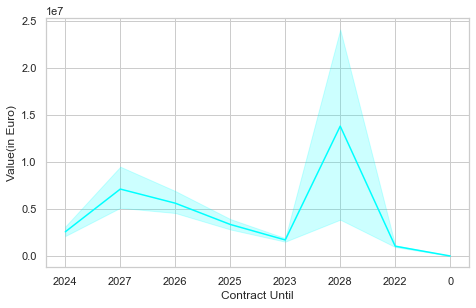

In [478]:
g = sns.lineplot(x="Contract Until", y="Value(in Euro)", data=fifa,color='cyan')

as this plot shows the prices spike at 2028 and 2027 which means the player that we would be lokking for would have a contract that ends within the next 4 years or by the end of 2026. In addition, recent news show that the transfer budget for manchester united next season would be around 100 million british pounds which should be around 116 million euros, so we will remove players with higher values.

In [479]:
fifa=fifa[fifa['Contract Until'] != '2028']
fifa=fifa[fifa['Contract Until'] != '2027']
fifa=fifa[fifa['Value(in Euro)'] <= 116000000]

In [480]:
fifa.shape

(3963, 55)

Of course,cristiano fits into some of the exceptions that we dropped like being a manchester united player and being over 28, so I will add him again to the data frame with the exact same attributes.

In [481]:
fifa = fifa.append(Cristiano)

/var/folders/_5/fk2q70ks6cv1r4lh88zxfj480000gn/T/ipykernel_1815/706814428.py:1: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



 ## Model Building

### K-means clustering 

In [482]:
stats = ['Weak Foot Rating','Skill Moves','Crossing','Finishing','Heading Accuracy',            
'Short Passing','Volleys','Dribbling','Curve','Freekick Accuracy','LongPassing','BallControl','Acceleration',             
'Sprint Speed' ,'Agility','Reactions','Balance' ,'Shot Power','Jumping','Stamina' ,'Strength' ,'Long Shots','Aggression' ,'Interceptions','Positioning','Vision','Penalties','Composure' ,'Marking','Standing Tackle' ,'Sliding Tackle'    ]

In [483]:
df = fifa[['Weak Foot Rating','Skill Moves','Crossing','Finishing','Heading Accuracy',            
'Short Passing','Volleys','Dribbling','Curve','Freekick Accuracy','LongPassing','BallControl','Acceleration',             
'Sprint Speed' ,'Agility','Reactions','Balance' ,'Shot Power','Jumping','Stamina' ,'Strength' ,'Long Shots','Aggression' ,'Interceptions','Positioning','Vision','Penalties','Composure' ,'Marking','Standing Tackle' ,'Sliding Tackle'    ]]

In [484]:
df.head()

,Weak Foot Rating,Skill Moves,Crossing,Finishing,Heading Accuracy,Short Passing,Volleys,Dribbling,Curve,Freekick Accuracy,...,Long Shots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle
10,5,3,80,93,85,84,87,83,82,65,...,86,80,44,94,87,92,92,50,36,38
59,4,4,58,88,84,76,90,84,78,54,...,76,90,45,86,80,74,86,55,31,44
63,4,5,72,84,50,75,72,92,77,62,...,76,58,26,82,75,65,79,32,25,18
67,4,4,78,86,42,82,83,87,74,62,...,82,63,38,86,82,68,82,45,44,43
75,3,5,84,84,65,81,75,87,85,83,...,83,72,28,85,85,76,80,23,31,20


In [485]:
from sklearn import preprocessing
x = df.values 
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)

In [486]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
r = pd.DataFrame(pca.fit_transform(X_norm))

In [487]:
from sklearn.cluster import KMeans

# specify the number of clusters
kmeans = KMeans(n_clusters=8, init='random', random_state=0)
# fit the data
kmeans = kmeans.fit(r)
# get the cluster labels
name= fifa['Known As'].tolist()
labels = kmeans.predict(r)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
 

In [488]:
r['cluster'] = clusters
r['names'] = name
fifa['cluster'] = clusters
r.columns = ['x','y','cluster','names']
r.head()

,x,y,cluster,names
0,1.547070,1.112440,1,H. Kane
1,1.480716,0.873494,1,L. Martínez
2,1.254202,0.730178,1,Vinícius Jr.
3,1.420896,0.460077,4,S. Gnabry
4,1.420196,1.000743,1,M. Depay


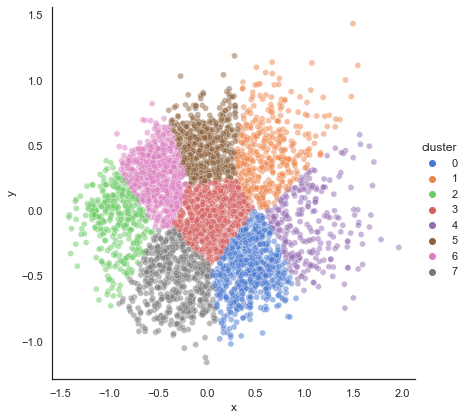

In [489]:
import seaborn as sns
sns.set_theme(style="white")



# Plot x against y with other semantics
sns.relplot(x="x", y="y", hue="cluster",
            sizes=(40, 400), alpha=.5, palette="muted",
            height=6, data=r)

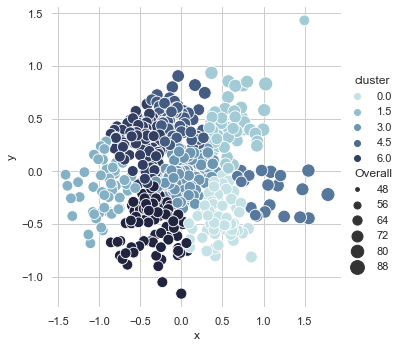

In [495]:
import seaborn as sns
sns.set_theme(style="whitegrid")


cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=r,
    x="x", y="y",
    hue="cluster", size=fifa['Overall'],
    palette=cmap, sizes=(10, 200),
)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

In [414]:
# Find Cristiano's Cluster
def Cluster(x):
    return fifa[fifa['Known As'] == x][['Known As', 'cluster']]
Cluster('Cristiano Ronaldo')

,Known As,cluster
8,Cristiano Ronaldo,1


In [415]:
fifa[fifa['cluster'] == 1].head(12)

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,cluster
10,H. Kane,89,89,105500000,3,England,28,188,89,2193,...,80,44,94,87,92,92,50,36,38,1
59,L. Martínez,86,90,98500000,3,Argentina,24,174,72,2163,...,90,45,86,80,74,86,55,31,44,1
63,Vinícius Jr.,86,92,109000000,3,Brazil,21,176,73,1985,...,58,26,82,75,65,79,32,25,18,1
75,M. Depay,85,85,55000000,3,Netherlands,28,176,78,2089,...,72,28,85,85,76,80,23,31,20,1
128,Rafael Leão,84,90,66500000,3,Portugal,23,188,81,1971,...,60,24,82,74,63,81,22,24,21,1
135,L. Sané,84,85,49500000,3,Germany,26,183,80,2086,...,63,34,81,81,71,82,36,32,35,1
147,Oyarzabal,84,86,53000000,3,Spain,25,181,79,2044,...,52,29,85,82,84,83,55,32,30,1
152,D. Vlahović,84,91,86500000,3,Serbia,22,190,75,1912,...,60,24,88,68,73,80,19,26,24,1
166,V. Osimhen,83,89,58000000,3,Nigeria,23,185,78,1999,...,69,34,85,69,75,79,36,43,19,1
173,C. Gakpo,83,87,52000000,3,Netherlands,23,189,76,2057,...,60,39,81,79,68,78,43,38,28,1


In [416]:
final_replacements = fifa[fifa['cluster'] == 1]

In [417]:
final_replacements.shape

(396, 56)

In [418]:
final_replacements=final_replacements[final_replacements['Potential']>=85]

In [419]:
final_replacements.shape

(27, 56)

In [420]:
final_replacements

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,cluster
10,H. Kane,89,89,105500000,3,England,28,188,89,2193,...,80,44,94,87,92,92,50,36,38,1
59,L. Martínez,86,90,98500000,3,Argentina,24,174,72,2163,...,90,45,86,80,74,86,55,31,44,1
63,Vinícius Jr.,86,92,109000000,3,Brazil,21,176,73,1985,...,58,26,82,75,65,79,32,25,18,1
75,M. Depay,85,85,55000000,3,Netherlands,28,176,78,2089,...,72,28,85,85,76,80,23,31,20,1
128,Rafael Leão,84,90,66500000,3,Portugal,23,188,81,1971,...,60,24,82,74,63,81,22,24,21,1
135,L. Sané,84,85,49500000,3,Germany,26,183,80,2086,...,63,34,81,81,71,82,36,32,35,1
147,Oyarzabal,84,86,53000000,3,Spain,25,181,79,2044,...,52,29,85,82,84,83,55,32,30,1
152,D. Vlahović,84,91,86500000,3,Serbia,22,190,75,1912,...,60,24,88,68,73,80,19,26,24,1
166,V. Osimhen,83,89,58000000,3,Nigeria,23,185,78,1999,...,69,34,85,69,75,79,36,43,19,1
173,C. Gakpo,83,87,52000000,3,Netherlands,23,189,76,2057,...,60,39,81,79,68,78,43,38,28,1


There are 27 possible replacements that were found using the K-means clustering algorithm with potential 85 or higher which is good, but we need players that have high potential for the future as well as immediate effect that will help the team so players like Y. Moukoko who is 17 years old and potential of 88 is perfect for the future but his rating now is still 69 so he won't be able to help the team right away. to solve this,we will drop all players with overall less that 83.

In [421]:
final_replacements=final_replacements[final_replacements['Overall'] >= 83]
final_replacements=final_replacements[final_replacements['Known As']!= 'Cristiano Ronaldo']

In [422]:
final_replacements

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,cluster
10,H. Kane,89,89,105500000,3,England,28,188,89,2193,...,80,44,94,87,92,92,50,36,38,1
59,L. Martínez,86,90,98500000,3,Argentina,24,174,72,2163,...,90,45,86,80,74,86,55,31,44,1
63,Vinícius Jr.,86,92,109000000,3,Brazil,21,176,73,1985,...,58,26,82,75,65,79,32,25,18,1
75,M. Depay,85,85,55000000,3,Netherlands,28,176,78,2089,...,72,28,85,85,76,80,23,31,20,1
128,Rafael Leão,84,90,66500000,3,Portugal,23,188,81,1971,...,60,24,82,74,63,81,22,24,21,1
135,L. Sané,84,85,49500000,3,Germany,26,183,80,2086,...,63,34,81,81,71,82,36,32,35,1
147,Oyarzabal,84,86,53000000,3,Spain,25,181,79,2044,...,52,29,85,82,84,83,55,32,30,1
152,D. Vlahović,84,91,86500000,3,Serbia,22,190,75,1912,...,60,24,88,68,73,80,19,26,24,1
166,V. Osimhen,83,89,58000000,3,Nigeria,23,185,78,1999,...,69,34,85,69,75,79,36,43,19,1
173,C. Gakpo,83,87,52000000,3,Netherlands,23,189,76,2057,...,60,39,81,79,68,78,43,38,28,1


Now that we have the final 10 rows of players that can potentially replace ronaldo. let's eliminate a couple that might not be fit for the role like the following players: -

   1 - Harry Kane / He is the star of tottenham and they will not let him go to a rival team easily.
   
   2 - Vinicius junior / he is not the player that manchester united need as he is small and injury prone.
   
   3 - Memphis Depay / he was in Manchester United a long time ago but he left on bad terms so seems unlikely to join    again.
   
   4 - Oyarzabal / Similar to Vinicius jr. he doesn't have a striker build as well as playing as a winger

In [423]:
final_replacements = final_replacements[final_replacements['Known As']!='H. Kane']
final_replacements = final_replacements[final_replacements['Known As']!='Vinícius Jr.']
final_replacements = final_replacements[final_replacements['Known As']!='M. Depay']
final_replacements = final_replacements[final_replacements['Known As']!='Oyarzabal']

In [424]:
final_replacements

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,cluster
59,L. Martínez,86,90,98500000,3,Argentina,24,174,72,2163,...,90,45,86,80,74,86,55,31,44,1
128,Rafael Leão,84,90,66500000,3,Portugal,23,188,81,1971,...,60,24,82,74,63,81,22,24,21,1
135,L. Sané,84,85,49500000,3,Germany,26,183,80,2086,...,63,34,81,81,71,82,36,32,35,1
152,D. Vlahović,84,91,86500000,3,Serbia,22,190,75,1912,...,60,24,88,68,73,80,19,26,24,1
166,V. Osimhen,83,89,58000000,3,Nigeria,23,185,78,1999,...,69,34,85,69,75,79,36,43,19,1
173,C. Gakpo,83,87,52000000,3,Netherlands,23,189,76,2057,...,60,39,81,79,68,78,43,38,28,1


## Who will replace Cristiano Ronaldo? (Final)

In [425]:
final_replacements

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,cluster
59,L. Martínez,86,90,98500000,3,Argentina,24,174,72,2163,...,90,45,86,80,74,86,55,31,44,1
128,Rafael Leão,84,90,66500000,3,Portugal,23,188,81,1971,...,60,24,82,74,63,81,22,24,21,1
135,L. Sané,84,85,49500000,3,Germany,26,183,80,2086,...,63,34,81,81,71,82,36,32,35,1
152,D. Vlahović,84,91,86500000,3,Serbia,22,190,75,1912,...,60,24,88,68,73,80,19,26,24,1
166,V. Osimhen,83,89,58000000,3,Nigeria,23,185,78,1999,...,69,34,85,69,75,79,36,43,19,1
173,C. Gakpo,83,87,52000000,3,Netherlands,23,189,76,2057,...,60,39,81,79,68,78,43,38,28,1


The table above leaves us with 6 candidates to replace this icon of football. lets compare some of their factors and attributes to see who would be the best and final choice.

#### Values

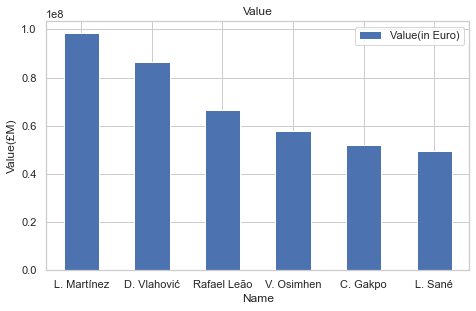

In [426]:
final_replacements_sorted= final_replacements.sort_values('Value(in Euro)',ascending=False)
ax = final_replacements_sorted.plot.bar(x='Known As', y='Value(in Euro)', rot=0)
plt.title('Value')
plt.xlabel('Name')
plt.ylabel('Value(£M)')
plt.show()

#### Composure

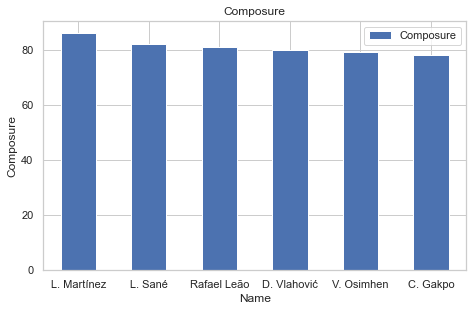

In [496]:
final_replacements_sorted= final_replacements.sort_values('Composure',ascending=False)
ax = final_replacements_sorted.plot.bar(x='Known As', y='Composure', rot=0)
plt.title('Composure')
plt.xlabel('Name')
plt.ylabel('Composure')
plt.show()

#### Reactions

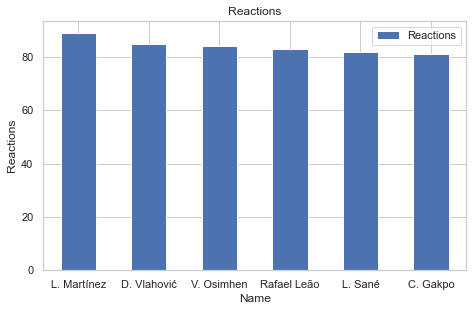

In [428]:
final_replacements_sorted= final_replacements.sort_values('Reactions',ascending=False)
ax = final_replacements_sorted.plot.bar(x='Known As', y='Reactions', rot=0)
plt.title('Reactions')
plt.xlabel('Name')
plt.ylabel('Reactions')
plt.show()

#### Finishing

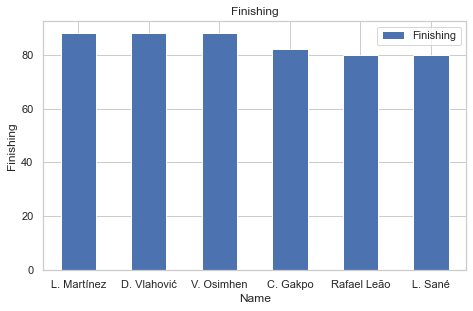

In [429]:
final_replacements_sorted= final_replacements.sort_values('Finishing',ascending=False)
ax = final_replacements_sorted.plot.bar(x='Known As', y='Finishing', rot=0)
plt.title('Finishing')
plt.xlabel('Name')
plt.ylabel('Finishing')
plt.show()

#### Dribbling

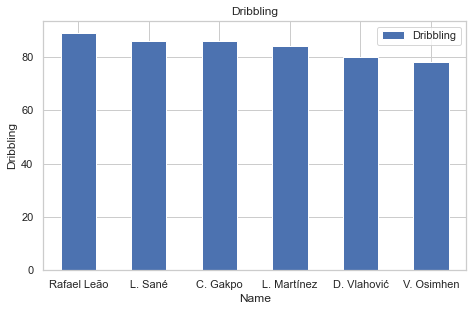

In [430]:
final_replacements_sorted= final_replacements.sort_values('Dribbling',ascending=False)
ax = final_replacements_sorted.plot.bar(x='Known As', y='Dribbling', rot=0)
plt.title('Dribbling')
plt.xlabel('Name')
plt.ylabel('Dribbling')
plt.show()

In [431]:
final_replacements

,Known As,Overall,Potential,Value(in Euro),Best Position,Nationality,Age,Height(in cm),Weight(in kg),TotalStats,...,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,Standing Tackle,Sliding Tackle,cluster
59,L. Martínez,86,90,98500000,3,Argentina,24,174,72,2163,...,90,45,86,80,74,86,55,31,44,1
128,Rafael Leão,84,90,66500000,3,Portugal,23,188,81,1971,...,60,24,82,74,63,81,22,24,21,1
135,L. Sané,84,85,49500000,3,Germany,26,183,80,2086,...,63,34,81,81,71,82,36,32,35,1
152,D. Vlahović,84,91,86500000,3,Serbia,22,190,75,1912,...,60,24,88,68,73,80,19,26,24,1
166,V. Osimhen,83,89,58000000,3,Nigeria,23,185,78,1999,...,69,34,85,69,75,79,36,43,19,1
173,C. Gakpo,83,87,52000000,3,Netherlands,23,189,76,2057,...,60,39,81,79,68,78,43,38,28,1


so in the past graphs I compared all of the players' values, composure, reactions, finishing and dribbling. They were all really similar as they came from the same clsuter but some players exceeded the others like lautaro martinez. Which would be my first choice if he was not very expensive and his body type was taller (he is 174 cm and Cristiano was 187cm)

The final choice of replacement for me was Dusan Vlahovic where he has the highest potential of 91 which exceeds Cristiano, has a tall body type, he is only 22 years old, and exceeds in the needed attributes like reactions and finishing. Although his price might be a bit high, but the club is getting what it is paying for.

On the other hand if the club is looking for a cheaper alternative, I would recommend Cody Gakpo. He is still young as well, has high growth potential, has a tall body type, and has TotalStats more than most of the other players. His attributes are on par with the other players and surely will get better in the future.

In [432]:
no_name=final_replacements[['Weak Foot Rating','Skill Moves','Crossing','Finishing','Heading Accuracy',            
'Short Passing','Volleys','Dribbling','Curve','Freekick Accuracy','LongPassing','BallControl','Acceleration',             
'Sprint Speed' ,'Agility','Reactions','Balance' ,'Shot Power','Jumping','Stamina' ,'Strength' ,'Long Shots','Aggression' ,'Interceptions','Positioning','Vision','Penalties','Composure' ,'Marking','Standing Tackle' ,'Sliding Tackle'    ]]

In [271]:
import plotly.graph_objects as go
def Convert(lst):
    return [ -i for i in lst ]
sr3 = Convert(no_name.iloc[6])
fig = go.Figure()
fig.add_trace(go.Bar(x=no_name.iloc[3], y=stats,orientation='h',
                base=0,
                marker_color='rgb(158,202,225)',
                name='Dusan Vlahovic',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=1.5,
                opacity= 0.7,
                text = no_name.iloc[3],
                textposition='outside'
                ))
fig.add_trace(go.Bar(x=no_name.iloc[6], y=stats,orientation='h',
                base=sr3,
                marker_color='crimson',
                name='Cristiano Ronaldo',
                marker_line_color='red',
                marker_line_width=1.5,
                opacity= 0.7,
                text = sr3,
                textposition='auto'
                ))
fig.update_layout(
    height=500,
    title_text='Cristiano vs Vlahovic',
    barmode='overlay',xaxis_tickangle=-45,bargap=0.30
    )
fig.show()

In [270]:
import plotly.graph_objects as go
def Convert(lst):
    return [ -i for i in lst ]
sr3 = Convert(no_name.iloc[6])
fig = go.Figure()
fig.add_trace(go.Bar(x=no_name.iloc[5], y=stats,orientation='h',
                base=0,
                marker_color='rgb(158,202,225)',
                name='Cody Gakpo',
                marker_line_color='rgb(8,48,107)',
                marker_line_width=1.5,
                opacity= 0.7,
                text = no_name.iloc[5],
                textposition='outside'
                ))
fig.add_trace(go.Bar(x=no_name.iloc[6], y=stats,orientation='h',
                base=sr3,
                marker_color='crimson',
                name='Cristiano Ronaldo',
                marker_line_color='red',
                marker_line_width=1.5,
                opacity= 0.7,
                text = sr3,
                textposition='auto'
                ))
fig.update_layout(
    height=500,
    title_text='Cristiano vs Gakpo',
    barmode='overlay',xaxis_tickangle=-45,bargap=0.30
    )
fig.show()